In [1]:
%tensorflow_version 2.x #this line is not required unless you are in a otebook

# Tensorflow ant tf.Keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Dataset

For this tutorial we will usw the MNIST Fashion Dataset. This is a dataset that is included in Keras.
This dataset includes 60000 images for training and 10000 images for validation/ testing.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  #load dataset

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()  #split into training and testing

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
type(train_images)

(60000, 28, 28)


numpy.ndarray

So we've got 60000 images that are made up of 28x28 pixels(784 in total)

In [4]:
train_images[0,23,23] #let's have a look at one pixel

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscake image as these are no color channels.

In [5]:
train_labels[:10]  #let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

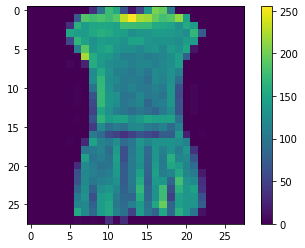

In [7]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simpy scale all of our greyscale pixel values(0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255. we do this because smaller values will make it easier for the model to process our values.


In [8]:
train_images =  train_images / 255

test_images = test_images / 255

# Building the Model

We are going to use a Keras sequential model with three different layers. This model represents a feed-forward neural network, we'll break down each layer and its architecture below.

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28, 28)), #input layer (1)
    keras.layers.Dense(128, activation = 'relu'), #input layer (2)
    keras.layers.Dense(10, activation = 'softmax') #output layer(3)
])

# Compile the Model

The last step in building the model is to define the loss function, Optimizer and metrics we would like to track.

In [16]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


Training the model


In [17]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4932 - accuracy: 0.8282
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3730 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3350 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3101 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2913 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2798 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2674 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2563 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2459 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

Evaluating the Model

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('test loss :', test_loss)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3264 - accuracy: 0.8867
test loss : 0.3263917863368988
test accuracy:  0.8866999745368958


Make production

In [24]:
predictions = model.predict(test_images[0])
print(predictions)

1/1 [==============================] - 0s 21ms/step
[[2.4685820e-09 1.2887036e-09 3.3286313e-10 7.4359041e-13 1.5895557e-09
  1.4074631e-03 4.1516236e-07 5.1166173e-03 2.9854487e-08 9.9347550e-01]]


In [25]:
print(np.argmax(predictions))


9


In [28]:
print(class_names[np.argmax(predictions)])

Ankle boot


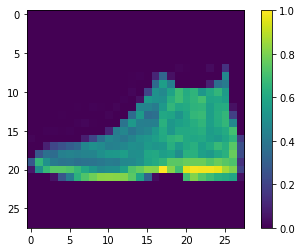

In [30]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Verfying Predictions

I've written a small function here to help us verify predictions with some simple visuals.

Pick a number:45
1/1 [==============================] - 0s 22ms/step


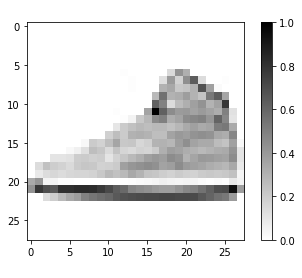

In [48]:
color = 'white'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color

def predict(model, image, correct_label):
  class_names = ['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

  prediction =model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)



def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected:"+ label)
  plt.xlabel("Guess:"+ guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number:")
    if num.isdigit():
      num = int(num)
      if 0<= num <= 1000:
        return int(num)
    else :
      print("Try again")


num = get_number()
image = test_images[num]
label = test_labels[num]

predict(model, image, label)
